In [118]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [119]:
# https://constantijnkaland.github.io/contourclustering/#references

In [120]:
df = pd.read_csv('bestiary/averageAll.txt', sep="\t")

In [16]:
intensities = df[[f'intensity{i}' for i in range(1, 10)]].values
ts = df[[f'intensity{i}_time' for i in range(1, 10)]].values

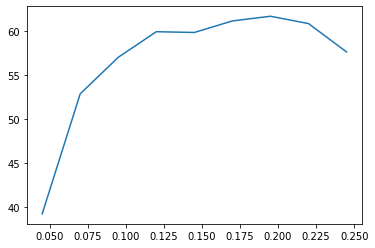

In [17]:
plt.plot(ts[0, :], intensities[0, :])

In [21]:
df.columns

Index(['item', 'condition', 'participant', 'experiment', 'fileName', 'word',
       'wordLabel', 'woiLabel', 'wordOnset', 'wordOffset', 'duration',
       'silence', 'duraSil', 'phoneLength', 'meanPitch', 'maxPitch',
       'maxPitTime', 'minPitch', 'minPitTime', 'meanIntensity', 'maxIntensity',
       'maxIntTime', 'intensity1', 'intensity1_time', 'intensity2',
       'intensity2_time', 'intensity3', 'intensity3_time', 'intensity4',
       'intensity4_time', 'intensity5', 'intensity5_time', 'intensity6',
       'intensity6_time', 'intensity7', 'intensity7_time', 'intensity8',
       'intensity8_time', 'intensity9', 'intensity9_time', 'intensity10',
       'intensity10_time', 'zstart', 'zend', 'zDuration', 'zPhonelength',
       'zmeanPitch', 'zmaxPitch', 'zmaxPitTime', 'zminPitch', 'zminPitTime',
       'zmeanIntensity', 'zmaxIntensity', 'zmaxIntTime', 'zLabel',
       'experiment.other', 'Contour', 'Prominence', 'Gender', 'Context',
       'recordedFile', 'slice', 'pitch', 'time', 's

In [122]:
def parse_arr(arr):
    return np.array([float(x) for x in arr[1:-1].split(', ')])

In [125]:
df = pd.read_csv('bestiary/clean_4noi.csv')
contours = df['f0'].map(parse_arr)

In [134]:
C = np.array([c.tolist() for c in contours])

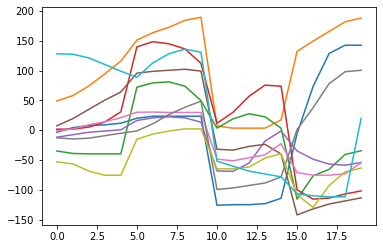

In [140]:
for i in range(10):
    plt.plot(C[i, :])

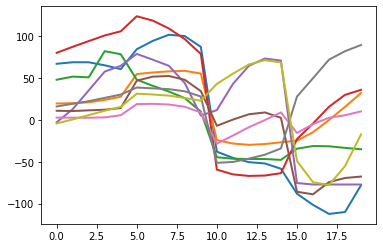

In [158]:
labels = df['label']
for i, label in enumerate(set(labels)):
    # plt.plot(C[df['label'] == label, :].T, c=f'C{i}', lw=0.1)
    plt.plot(C[df['label'] == label, :].mean(axis=0), c=f'C{i}', lw=2)

In [166]:
from scipy.spatial.distance import pdist
import diptest

In [169]:
import seaborn as sns

In [171]:
import umap

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


In [172]:
X = umap.UMAP().fit_transform(C)

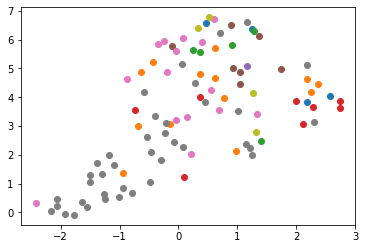

In [173]:
labels = df['label']
for i, label in enumerate(set(labels)):
    # plt.plot(C[df['label'] == label, :].T, c=f'C{i}', lw=0.1)
    match = df['label'] == label
    plt.scatter(X[match, 0], X[match, 1], c=f'C{i}')

<AxesSubplot:ylabel='Count'>

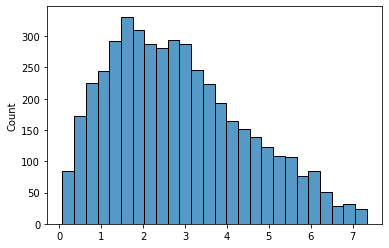

In [174]:
sns.histplot(pdist(X))

In [175]:
diptest.diptest(pdist(X))

(0.002809061001159326, 0.9977273807693434)

In [73]:
C = np.array([c.astype(float) for c in contours[contours.map(len) == 15].values])

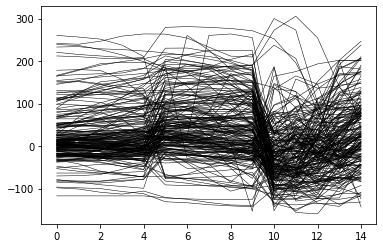

In [81]:
plt.plot(C[:, :].T, 'k', lw=0.5);

In [83]:
df

,file,info,label,f0
0,contour_15_2_2,Incredulity,Yes/No Rise,"[-30.390409469604492, -32.11734390258789, -37...."
1,contour_15_2_3,Implication,RFR,"[-6.2135090827941895, -6.2135090827941895, -6...."
2,contour_15_4_3,Implication,Fall,"[110.84981536865234, 117.09481048583984, 121.5..."
3,contour_15_8_1,Contradiction,Polarity Focus,"[109.49020385742188, 107.4186019897461, 102.58..."
4,contour_15_8_3,Implication,RFR,"[52.501808166503906, 50.77485656738281, 45.594..."
...,...,...,...,...
295,contour_1659_7_1,Contradiction,Yes/No Rise,"[12.942760467529297, 22.274673461914062, 31.24..."
296,contour_1659_7_2,Incredulity,Yes/No Rise,"[-35.42314529418945, -27.11527442932129, -17.1..."
297,contour_1659_7_3,Implication,RFR,"[-64.77387237548828, -66.84304809570312, -67.1..."
298,contour_1663_6_2,Incredulity,Yes/No Rise,"[11.697651863098145, 13.773075103759766, 15.84..."


# Dynamic Formant Datset

https://github.com/emmanuelferragne/dynamicFormantDataset

https://www.emmanuelferragne.com/post/formant-dynamics/

In [84]:
import pyreadr

In [93]:
result = pyreadr.read_r('~/repos/tmp/dynamicFormantDataset/dataGlasgow.RData')

result = pyreadr.read_r('~/repos/tmp/dynamicFormantDataset')


In [115]:
dir = '/Users/bas/repos/tmp/dynamicFormantDataset/export'

In [117]:
import glob
glob.glob(f'{dir}/data-*.csv')

['/Users/bas/repos/tmp/dynamicFormantDataset/export/data-75.csv',
 '/Users/bas/repos/tmp/dynamicFormantDataset/export/data-246.csv',
 '/Users/bas/repos/tmp/dynamicFormantDataset/export/data-252.csv',
 '/Users/bas/repos/tmp/dynamicFormantDataset/export/data-61.csv',
 '/Users/bas/repos/tmp/dynamicFormantDataset/export/data-49.csv',
 '/Users/bas/repos/tmp/dynamicFormantDataset/export/data-285.csv',
 '/Users/bas/repos/tmp/dynamicFormantDataset/export/data-291.csv',
 '/Users/bas/repos/tmp/dynamicFormantDataset/export/data-130.csv',
 '/Users/bas/repos/tmp/dynamicFormantDataset/export/data-124.csv',
 '/Users/bas/repos/tmp/dynamicFormantDataset/export/data-118.csv',
 '/Users/bas/repos/tmp/dynamicFormantDataset/export/data-332.csv',
 '/Users/bas/repos/tmp/dynamicFormantDataset/export/data-326.csv',
 '/Users/bas/repos/tmp/dynamicFormantDataset/export/data-327.csv',
 '/Users/bas/repos/tmp/dynamicFormantDataset/export/data-333.csv',
 '/Users/bas/repos/tmp/dynamicFormantDataset/export/data-119.csv'

In [114]:
glob.glob('/Users/bas/repos/tmp/dynamicFormantDataset/*')

['/Users/bas/repos/tmp/dynamicFormantDataset/dataGlasgow.RData',
 '/Users/bas/repos/tmp/dynamicFormantDataset/preprocessedGlasgowFormantTable.RDS',
 '/Users/bas/repos/tmp/dynamicFormantDataset/README.md',
 '/Users/bas/repos/tmp/dynamicFormantDataset/export']

In [105]:
df.query('speaker=="a
gla01"')

,speaker,word,condition,grouping,timeStep,value
0,gla01,bide,Short,gla01bideS,1,11.475323
1,gla01,byed,Long,gla01byedL,1,89.642067
2,gla01,pride,Short,gla01prideS,1,-28.303937
3,gla01,pried,Long,gla01priedL,1,21.254250
4,gla01,ride,Short,gla01rideS,1,-53.119527
...,...,...,...,...,...,...
3485,gla01,ryed,Long,gla01ryedL,30,-373.493057
3486,gla01,side,Short,gla01sideS,30,-450.183677
3487,gla01,sighed,Long,gla01sighedL,30,-365.921965
3488,gla01,tide,Short,gla01tideS,30,-442.695728


In [96]:
ls ~/repos/tmp/dynamicFormantDataset

README.md                            preprocessedGlasgowFormantTable.RDS
dataGlasgow.RData


In [91]:
for k in result:
    print(k)